##  type of recommender systems

### demographic filtering
gerneralized recommendations to every user, based on movie popularity, and/or genre.
recommends same movies for users with similar demographic features.
#### Too simple - since, every user is different

### content based filtering
#### If one like user like a item, he likes similar item
system uses item metadata, (genre, director, description, actors...) to recommend.

### Collaborative filtering
matches users with similar interest, provide recommnedations based on matchings.
no metadata required
#### same interest, same recommendations

leaned page:=https://www.kaggle.com/code/ibtesama/getting-started-with-a-movie-recommendation-system


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel 

df1 = pd.read_csv('../input/tmdb-movie-metadata/tmdb_5000_credits.csv')
df2 = pd.read_csv("../input/tmdb-movie-metadata/tmdb_5000_movies.csv")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# features in DataFrame df1 & df2
df1 (DataFrame 1)
- movie_id - ID for each movie
- cast 
- crew

df2 (DataFrame 2)
- budget 
- genre
- homepage - Link to homepage of the movie
- id - ID for each movie (same as movie_id in df1)
- keywords - keywords, tages related to movie
- original_language - Original language
- Original_title - title of movie before translation/adaptation
- overview - description of the movie
- popularity - A numerical quantity for movie popularity 
- production_companies - The production house
- production_countries - Country of origin
- release_date
- revenue - ww revenue
- runtime - in minutes
- status - "Released" or "Rumored"
- tagline - Movie's tagline
- Title - Title of the movie
- vote_average - average rating recieved
- vote_count

Joining df1, df2 on id column using [pandas.DataFrame.merge()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html)


In [2]:
df1.columns = ['id', 'tittle', 'cast', 'crew']
df2 = df2.merge(df1, on = 'id') 

peak our dataframe df2

In [3]:
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


## Demographic filtering

- metric to rate movie
- rate for every movie
- sort rates & rec best rated movie to users

#### Average ratings

- wr := weighted rating
- v (vote_count) := no. of votes
- m := min vote required to be listed in chart
- R (vote_average) := avg rating
- C := mean vote across whole movie dataset

$$wr = \left(\frac{v}{v+m}{.}R\right)+\left(\frac{m}{v+m}{.}C\right)$$



In [4]:
# C = mean of df2["vote_average"]
C = df2["vote_average"].mean()
C

6.092171559442016

#### m (min vote req) 
movie m_i(v) > 90% v of other movies


In [5]:
# m = mean rating 90th percentile as cutoff
m = df2["vote_count"].quantile(.9)
m

1838.4000000000015

filtering out movie based on qualifying

In [6]:
q_ = df2.copy().loc[df2["vote_count"] >= m]
q_.shape

(481, 23)

#### metric for movie


In [7]:
# weighted rating 
def weighted_rating (x, m=m, C=C):
    v = x["vote_count"]
    R = x["vote_average"]
    #calculate IMDB formula
    return (v/(v+m)*R + m/(v+m)*C)

In [8]:
# define new feature "score" & 
# calculate its value with weighted_rating
q_["score"] = q_.apply(weighted_rating, axis=1)

# sort movie based on score
q_ = q_.sort_values("score", ascending=False)
q_[["title", "vote_count", "vote_average", "score"]].head(18)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


Text(0, 0.5, 'popular movies')

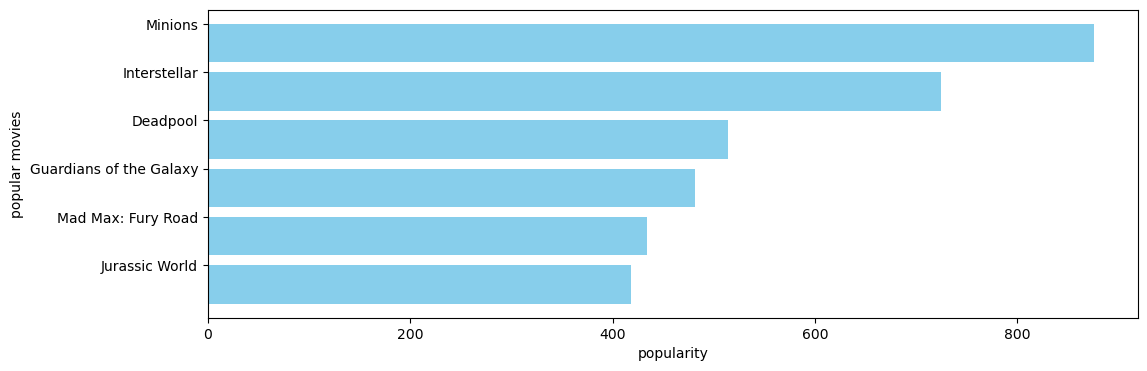

In [9]:
pop = df2.sort_values("popularity", ascending=False)

plt.figure(figsize=(12,4))
x = 6
plt.barh(pop["title"].head(x), pop["popularity"].head(x), 
         align="edge", color="skyblue")

plt.gca().invert_yaxis()
plt.xlabel("popularity")
plt.ylabel("popular movies")

# Content based filtering
To recommend similar movies 

In [10]:
df2[["overview", "title"]].head()

,overview,title
0,"In the 22nd century, a paraplegic Marine is di...",Avatar
1,"Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End
2,A cryptic message from Bond’s past sends him o...,Spectre
3,Following the death of District Attorney Harve...,The Dark Knight Rises
4,"John Carter is a war-weary, former military ca...",John Carter


#### Plot desciption based recommender


convert word vector 

compute Term Frequency-Inverse Document Frequency (TF-IDF) vectors

rel. f - of a word in doc 
 $$TF = \frac{term instances}{total instances}$$

do f - rel. count of docs containing the term - **IDF**
 = $$IDF = log \left(\frac{no. of doc}{doc with term}\right)$$
 
$$overall\hspace{.4em}importance = TF * IDF$$

=> matrix
column - contains all words in all doc
row - movie
* done to reduce importance of words occuring frequently in overviews and (final) **similarity score**

scikit-learn -> sklearn.feature_extraction.text - TfidfVectorizer

In [11]:


# def TF_IDF vectorizer obj. rm all english stop words (the, a )  
tfidf = TfidfVectorizer(stop_words = "english")

# replace NaN with empty string
df2["overview"] = df2["overview"].fillna('')

# construct req TF-IDF matrix- fit & transform data

tfidf_mat = tfidf.fit_transform(df2["overview"])

# o/p shape of tfidf_mat
tfidf_mat.shape

(4803, 20978)

(4803, 20978)
20, 978 diff words in overviews of 4803 movies

### similarity score
- euclidean 
- pearson
- cosine similarity score

### cosine similarity score
$$similarity=cos(\theta)=\frac{A.B}{||A||.||B||}$$
$$\frac{\sum_{i=1}^{n}A_i.B_i}{\sqrt{\sum_{i=1}^{n}A_1^2}.{\sqrt{\sum_{i=1}^{n}B_i^2}}}$$

TF-IDF vectorizer -> dot product give cosine similarity score

*sklearn linear_kernal(), than cosine_similarities()* {fast} 

In [12]:
# compute cosine similarity score

cos_sim = linear_kernel (tfidf_mat, tfidf_mat)
cos_sim.shape

(4803, 4803)

def a function, f(movie title) = o/p 10 similar movies

- reverse mappin of movie title <-> df indices 

In [13]:
# rev map of indices & movie title 
indices = pd.Series(df2.index, index = df2["title"]).drop_duplicates()

indices

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

## define  recommender function
- get id of movie from title
- cos similarity score for a movie with all movie
    - convert it to list of tuples, (pos, score)
- sort on score
- get top x+1 elements of list, first movie would be itself based of similarity score
- return title corr id of top x +1 elements 

In [14]:
# f (title, x) = x+1 most similar movies
def rec(title, score = cos_sim, x=10, indices = indices):
    """
    param:
    - title, string, title of the movie
    - score | = cos_sim - cosine similarity score
    - x | = 10, no. of title to be recommended  
    """
    # Get movie ID matching title 
    idx = indices[title]
    
    # Get pairwise sim scores of all movies with movie[idx]
    score = list(enumerate(score[idx]))
    
    # sort movie on score
    score = sorted(score, key=(lambda x : x[1]), reverse=True )
    
    # get scores of 10 most similar movies
    score = score[1:x+1]
    
    # get ID
    indices = [mi[0] for mi in score]
    
    # return list
    return df2["title"].iloc[indices]

In [15]:
rec("Avatar")


3604                       Apollo 18
2130                    The American
634                       The Matrix
1341            The Inhabited Island
529                 Tears of the Sun
1610                           Hanna
311     The Adventures of Pluto Nash
847                         Semi-Pro
775                        Supernova
2628             Blood and Chocolate
Name: title, dtype: object